In [1]:
import numpy as np
import scipy.sparse as sp
import nmarkov as nm
import matplotlib.pyplot as plt

In [2]:
import functools

In [3]:
Q=sp.csc_matrix(np.array([[-5,2,3],[2,-3,1],[1,1,-2]], dtype=np.float))
dQ = np.array([[-1,1,0],[0,0,0],[0,0,0]], dtype=np.float)

In [4]:
x0=np.array([1,0,0])
t=np.linspace(0, 1, num=100)
rwd=np.array([1,10,0])

In [5]:
v=nm.tprob(Q=Q, x0=x0, t=t)

In [6]:
x=nm.trwd(Q=Q, x0=x0, t=t, rwd=rwd, trans=False)

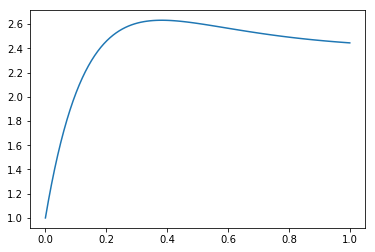

In [7]:
plt.plot(t, x[2])
plt.show()

In [8]:
pis = nm.sprob(Q)
print(pis)

[0.2173913  0.30434783 0.47826087]


In [9]:
nm.ssen(Q, b=pis @ dQ, pis=pis)

array([-0.02835539,  0.04725898, -0.01890359])

In [10]:
Q11=np.array([[-5,2,3],[2,-3,1],[1,1,-2]], dtype=np.float)
Q12=nm.eye(3)
Q2=nm.zeros((3,6))

In [11]:
x=nm.block([[Q11,Q12],[nm.zeros((3,3)), nm.zeros((3,3))]])

In [12]:
x.tocoo().toarray()

array([[-5.,  2.,  3.,  1.,  0.,  0.],
       [ 2., -3.,  1.,  0.,  1.,  0.],
       [ 1.,  1., -2.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
nm.rblock(nm.cblock(Q11, Q12), Q2).tocoo().toarray()

array([[-5.,  2.,  3.,  1.,  0.,  0.],
       [ 2., -3.,  1.,  0.,  1.,  0.],
       [ 1.,  1., -2.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
nm.mexpAx(x)

array([[0.21885603, 0.30429041, 0.47685357, 0.34001241, 0.2589305 ,
        0.40105709],
       [0.22261859, 0.31896689, 0.45841452, 0.20828516, 0.47232957,
        0.31938527],
       [0.21339907, 0.29507088, 0.49153005, 0.16744925, 0.21809459,
        0.61445615],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [14]:
nm.mexpAx(x, t=10)

array([[0.2173913 , 0.30434783, 0.47826087, 2.29678639, 2.99810964,
        4.70510396],
       [0.2173913 , 0.30434783, 0.47826087, 2.1663516 , 3.21550094,
        4.61814744],
       [0.2173913 , 0.30434783, 0.47826087, 2.12287334, 2.95463138,
        4.92249527],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [24]:
sp.kron(Q, Q).shape

TypeError: no supported conversion for types: (dtype('O'),)

In [19]:
len([[1,2],[1,3]])

2